In [12]:
from __future__ import absolute_import, division,print_function,unicode_literals
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#overview model

minst=tf.keras.datasets.mnist

In [37]:
(x_train,y_train),(x_test,y_test)=minst.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

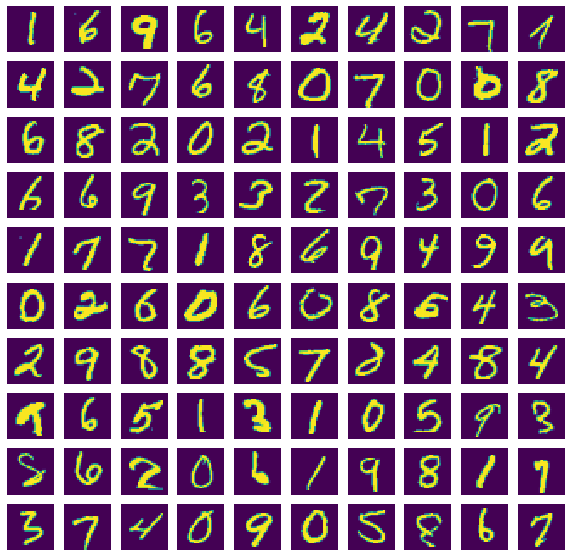

In [17]:
#print 10x10 images 
fig,ax=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[np.random.randint(x_train.shape[0])])
        ax[i][j].axis('off')

In [38]:
#normalize the data by dividing it by 255 
x_train,x_test=x_train/255.0,x_test/255.0

In [27]:
#build the tf.keras.Sequential model by stacking layers. choose an optimizer and loss function for training
model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation ='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [30]:
#compile the model
#adam optimizer is 
'''The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen 
broader adoption for deep learning applications in computer vision and natural language processing.
It adapts the learning rate per parameter'''
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [31]:
#train and evaluate the model
model.fit(x_train,y_train,epochs=5)
model.evaluate(x_test,y_test)

W0803 13:01:12.671075  9120 deprecation.py:323] From c:\users\nitin mali\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2923 - accuracy: 0.9151
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1417 - accuracy: 0.9577
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1046 - accuracy: 0.9680
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0863 - accuracy: 0.9734
Epoch 5/5
10000/10000 [==============================] - 1s 108us/sample - loss: 0.0754 - accuracy: 0.9764


[0.07540803022996988, 0.9764]

In [51]:
np.mean(np.argmax(model.predict(x_test),axis=1)==y_test)

0.9764